In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from functools import reduce

In [2]:
tesla = yf.Ticker("TSLA")
nio = yf.Ticker("NIO")
clean_energy = yf.Ticker("IQQH.F")
bitcoin = yf.Ticker("BTC-USD")
ethereum = yf.Ticker("ETH-USD")
litecoin = yf.Ticker("LTC-USD")
amazon = yf.Ticker("AMZN")
coca_cola = yf.Ticker("KO")
square = yf.Ticker("SQ")
paypal = yf.Ticker("PYPL")
berkshire_hathaway = yf.Ticker("BRK-A")
sp = yf.Ticker("CSPX.AS")
gold = yf.Ticker("GC=F")
silver = yf.Ticker("SI=F")
crude_oil = yf.Ticker("CL=F")
under_armour = yf.Ticker("UA")
gartner = yf.Ticker("IT")

#Ideally it would be great to have Twitter and FB, but there are issues with them, so let me keep them here till better times
#twitter = yf.Ticker("TWTR") not public any more
#facebook = yf.Ticker("FB") not found

In [3]:
#Let's try it with one ticker to see how the data looks:
def means_subtracted(row):
    row["Value - Mean"] = row.Open  - row.Mean # here is a function that subtracts the mean value
                                                #of the stock from the open value in each row
    return row

tesla_test = pd.DataFrame(tesla.history(period='1mo'))
tesla_test["Name"] = "tesla_test" # creating one more test column with the name of the stock
tesla_test["Mean"] = tesla_test.Open.mean()
tesla_test = tesla_test.apply(means_subtracted, axis = 1)
tesla_test

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Name,Mean,Value - Mean
Date,,,,,,,,,,
2024-07-08 00:00:00-04:00,247.710007,259.440002,244.570007,252.940002,157219600,0,0,tesla_test,234.742608,12.967399
2024-07-09 00:00:00-04:00,251.000000,265.609985,250.300003,262.329987,160210900,0,0,tesla_test,234.742608,16.257392
2024-07-10 00:00:00-04:00,262.799988,267.589996,257.859985,263.260010,128519400,0,0,tesla_test,234.742608,28.057380
2024-07-11 00:00:00-04:00,263.299988,271.000000,239.649994,241.029999,221707300,0,0,tesla_test,234.742608,28.557380
2024-07-12 00:00:00-04:00,235.800003,251.839996,233.089996,248.229996,155955800,0,0,tesla_test,234.742608,1.057395
2024-07-15 00:00:00-04:00,255.970001,265.600006,251.729996,252.639999,146912900,0,0,tesla_test,234.742608,21.227393
2024-07-16 00:00:00-04:00,255.309998,258.619995,245.800003,256.559998,126332500,0,0,tesla_test,234.742608,20.567389
2024-07-17 00:00:00-04:00,252.729996,258.470001,246.179993,248.500000,115584800,0,0,tesla_test,234.742608,17.987388
2024-07-18 00:00:00-04:00,251.089996,257.140015,247.199997,249.229996,110869000,0,0,tesla_test,234.742608,16.347388


In [4]:
# This is where the fun begins
# To find Pearson correlation coefficients, we need to determine the mean value for each stock.
# Let's find the mean for each stock, then subtract it from the value for each day to find deviations.
# There is a catch, however.
# Apparently, some stocks have missing days. However, the missing days may not be the same for all stocks
# So, we need to do some data cleaning. Otherwise, the correlation coefficients may be calculated incorrectly
# Let's find common days for all stocks and run the analysis only for those.


company_list = [tesla, nio, clean_energy, bitcoin, ethereum, litecoin, amazon, coca_cola, square, paypal, berkshire_hathaway, sp, gold, silver, crude_oil, under_armour, gartner]
no_missing_values_list, uniform_dates_list, deviations_list = [], [], []


# Let's write a function to remove the timestamp from the index column and keep only the date there
def split_date(row):
    #splitting the date and timestamp based on an empty space between them, selecting the date part via [0]
    row.Date = str(row.Date).split()[0]
    return row

# Let's write a function that will will remove rows with NaN values
def drop_na(company_list, no_missing_values_list):
    
    for i in range(len(company_list)):
        # here, after removing rows with NaN values in the Open column via drop_na function,
        # let's reset the index for each daraframe, for proper date manipulation in split_date function
        stock = company_list[i].history(period='1y')[pd.notna(company_list[i].history(period='1y').Open)].reset_index()
        stock = stock.apply(split_date, axis = 1)
        
        # let's create a Name column for the stock name. str(i) is of the folloing format:
        # abc<TICKER_NAME>cde. So we are extracting TICKER_NAME
        stock ["Name"] = str(company_list[i]).split(">")[0].split("<")[1]
        
        no_missing_values_list.append(stock)

drop_na(company_list, no_missing_values_list)

# Let's write a function that will determine the dates that are the same across all dataframes
# Let's then select the rows from each dataframe only for the common dates
def uniform_dates(no_missing_values_list, uniform_dates_list):
    
    # finding common dates across all dataframes
    common_dates = reduce(lambda left, right: pd.merge(left.Date, right.Date, how='inner', on=["Date"]), no_missing_values_list)

    # selecting only the rows with common dates for each dataframe, making the "Date" column an index again:
    for i in range(len(no_missing_values_list)):
        uniform_dates_stock = reduce(lambda left, right: pd.merge(left.Date, right, how='inner', on=["Date"]), [common_dates, no_missing_values_list[i]]).set_index("Date")
        uniform_dates_list.append(uniform_dates_stock)

uniform_dates(no_missing_values_list, uniform_dates_list)


# Let's write a function to create a deviation column (the difference between Open value and Mean)
def means_subtracted(row):
    row["Deviation"] = row.Open  - row.Mean
    return row

def means(uniform_dates_list, deviations_list):

    for stock in uniform_dates_list:
        
        # let's create Mean column, which will include the mean of all stock Open values
        # it will be used later in the means_subtracted function
        stock["Mean"] = stock.Open.mean()
        
        # each stock gets a deviation column, where, for each row (day), 
        # the Mean is subtracted from the Open value
        stock = stock.apply(means_subtracted, axis = 1)
         
        # creating a cleaned list of stocks
        deviations_list.append(stock)

means(uniform_dates_list, deviations_list)

# deviations_list[0] #we can test how the first [0] data frame looks after all the manipulations.

In [5]:
# Let's calculate correlations now. General things about Pearson's correlation coefficient
# can be learned here: https://www.investopedia.com/terms/c/correlation.asp

# Let's create a dictionary, where the keys will be stock names,
# and the values will be other dictionaries. The nested dinctionaries, in their turn,
# will have keys that are other stocks and values that are correlation coefficients between
# the key of the main dictionary and the key of the nested dictionary.

#Example:
# Let's say, we have 4 stocks: TSLA, NIO, AMZN, KO. We will have this dictionary:
# {'TSLA': {'NIO': 0.5, 'AMZN': 0.1, 'KO': -0.3}, 'NIO': {'AMZN': 0.4, 'KO': 0.2}, 'AMZN': {'KO':0.1}}

# What it means is that correlation coefficients are calculated for each stock,
# the key of the outer dictionary is the stock for which we calculate correlations with every other stock
# which is the key of the inner dictionary.
# And the value of the inner dictionary is the coefficient itself.

# So, TSLA - NIO correlation is 0.5, TSLA - AMZN: 0.1, TSLA - KO: -0.3;
# NIO - AMZN: 0.4, NIO - KO: 0.2, and so on.

# Please note that as we are inerating through all the stocks in the initial list,
# we need to calculate coefficients only for the stocks that come after it. E.g. for NIO, element [1]
# in the list, we calculate coefficients for elements [2] - AMZN, and [3] - KO,
# as TSLA - NIO is already calculated.



# Let's write a function that will take a list of cleaned data frames (deviations_list),
# and will calculate correlation coefficients for it:
def correlation(deviations_list):
    coefficients = {}
    for i in range(len(deviations_list)-1):
        i_deviations = deviations_list[i]["Deviation"]
        i_deviations_squared_sum = sum([k**2 for k in i_deviations])
        coeff_dict = {}
        
        for j in range(i+1, len(deviations_list)): #deviations_list[deviations_list.index(i)+1 :]):
            j_deviations = deviations_list[j]["Deviation"]
            
            
            numerator = sum([k*l for (k, l) in zip(i_deviations, j_deviations)])
            
            j_deviations_squared_sum = sum([l**2 for l in j_deviations])
            denominator = (i_deviations_squared_sum * j_deviations_squared_sum)**0.5
            
            coefficient = round(numerator / denominator, 2)
            
            coeff_dict[deviations_list[j].Name[0]] = coefficient
            
        coefficients[deviations_list[i].Name[0]] = coeff_dict
        
    return coefficients
            

coefficients = correlation(deviations_list)
coefficients

{'TSLA': {'NIO': 0.68,
  'IQQH.F': 0.48,
  'BTC-USD': -0.72,
  'ETH-USD': -0.69,
  'LTC-USD': -0.66,
  'AMZN': -0.61,
  'KO': -0.36,
  'SQ': -0.51,
  'PYPL': -0.35,
  'BRK-A': -0.57,
  'CSPX.AS': -0.54,
  'GC=F': -0.55,
  'SI=F': -0.38,
  'CL=F': 0.12,
  'UA': 0.06,
  'IT': -0.52},
 'NIO': {'IQQH.F': 0.75,
  'BTC-USD': -0.85,
  'ETH-USD': -0.81,
  'LTC-USD': -0.4,
  'AMZN': -0.82,
  'KO': -0.59,
  'SQ': -0.48,
  'PYPL': -0.24,
  'BRK-A': -0.78,
  'CSPX.AS': -0.84,
  'GC=F': -0.82,
  'SI=F': -0.65,
  'CL=F': 0.17,
  'UA': 0.12,
  'IT': -0.79},
 'IQQH.F': {'BTC-USD': -0.48,
  'ETH-USD': -0.41,
  'LTC-USD': -0.22,
  'AMZN': -0.42,
  'KO': -0.14,
  'SQ': -0.22,
  'PYPL': 0.15,
  'BRK-A': -0.33,
  'CSPX.AS': -0.38,
  'GC=F': -0.42,
  'SI=F': -0.21,
  'CL=F': 0.15,
  'UA': 0.07,
  'IT': -0.56},
 'BTC-USD': {'ETH-USD': 0.98,
  'LTC-USD': 0.7,
  'AMZN': 0.92,
  'KO': 0.72,
  'SQ': 0.72,
  'PYPL': 0.47,
  'BRK-A': 0.89,
  'CSPX.AS': 0.91,
  'GC=F': 0.89,
  'SI=F': 0.75,
  'CL=F': -0.22,
  'UA':

In [7]:
# To determine which stocks to buy for the most diverse portfolio,
# we need to find the ones with the correlation coefficients as close to -1 as possible.


master_list = []

# Let's write a function that will convert our dictionary to the list of lists,
# where each internal list is a pair of stocks and their correlation coefficient like
# [['TSLA', 'NIO', 0.67], ['TSLA', 'IQQH.F', 0.49], ...]

for i in coefficients:
    dict_to_list = [list(j) for j in coefficients[i].items()]
    for j in dict_to_list:
        j.insert(0, i)
    
    master_list.extend(dict_to_list)

# Let's now sort the elements in the master list that we created based on correlation coefficients,
# which are elements [2] in each internal list.
# We will receive a sorted list where the internal lists will be ordered based on their [2] element --
# correlation coefficient.

sorted_stocks = sorted(master_list, key=lambda x: x[2])

count_stocks = []

# Not, let's handle edge cases. Let's say, in our ordered list, we have the following elements:
# [[A, B, -0.90], [C, D, - 0.89], ...]
# This is a straightforward case, we just need to buy stocks A, B, C, D from the first 2 inner lists

# What if we have the following:
# [[A, B, -0.90], [A, C, - 0.89], [A, D, - 0.85], ...]
# In this case, we also need to buy A, B, C, D, but they are in the first 3 inner lists

# An even more interesting case:
# [[A, B, -0.90], [A, C, - 0.89], [D, E, - 0.85], [E, F, - 0.83], [B, K, - 0.79], ...]
# Naturally, in this case we buy A, B, C, as A - B pair, followed by A - C pair, have the most extreme
# negatie correlations.
# What about the 4 stock? Surely, if we could buy more than 4 stocks, we should have just buyed  D - E pair.
# However, we are allowed to buy only 4 stocks. First 3 are already bought, and they form the first 2 pairs.
# So, we need to find the stock pair that will have at least one of the 3 stocks we already bought (A, B, C)
# and that will have the lowest possible coefficient.
# In the example above, it's the B - K pair.


# Let's create a loop that goes through the sorted lists and collects stocks from it,
# saving them in the count_stocks list.
# In the final_list, we have the unique stocks from count_stocks, achieved by set() finction.
# If the number of unique stocks in the final_list is 4, we exit the loop.
# If the number of elements in the final list is 5, we remove the last 2 elements in count_stocks, and in the loop,
# move to the next stock pair and check them.
# In the last edge case from above, we would get [A, B], then [A, B, A, C], converted to [A, B, C] with set()
# Then [A, B, A, C, D, E], from which we get the final_list of [A, B, C, D, E], 5 stocks.
# So, we reset [A, B, A, C, D, E] to [A, B, A, C]
# Then [A, B, A, C, E, F], from which we get the final_list of [A, B, C, E, F], 5 stocks.
# So, we reset [A, B, A, C, E, F] to [A, B, A, C]
# Finally, [A, B, A, C, B, K], from which we get the fina_list of [A, B, C, K], which has 4 elements
# which is what we need.

for i in range(len(sorted_stocks)):
    stock_number = [j for j in sorted_stocks[i][:2]]
    count_stocks.extend(stock_number)
    final_list = set(count_stocks)
    if len(final_list) == 4:
        recommended_stocks_num = i
        break
    if len(final_list) == 5:
        count_stocks = count_stocks[:-2]
        
if i<=2:
    print("Based on the correlation analysis for the last 12 months, here is a list of stock-pairs with their coefficients (4 stocks total):", sorted_stocks[:i+1])
    print("So, you can go ahead and buy these stocks: {}, {}, {}, {}".format(list(final_list)[0], list(final_list)[1], list(final_list)[2], list(final_list)[3]))
else:
    print("Based on the correlation analysis for the last 12 months, here is a list of stock-pairs with their coefficients (4 stocks total)", sorted_stocks[:2], sorted_stocks[i])
    print("So, you can go ahead and buy these stocks: {}, {}, {}, {}".format(list(final_list)[0], list(final_list)[1], list(final_list)[2], list(final_list)[3]))

Based on the correlation analysis for the last 12 months, here is a list of stock-pairs with their coefficients (4 stocks total): [['NIO', 'BTC-USD', -0.85], ['NIO', 'CSPX.AS', -0.84], ['NIO', 'AMZN', -0.82]]
So, you can go ahead and buy these stocks: NIO, BTC-USD, AMZN, CSPX.AS


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:2019: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/li

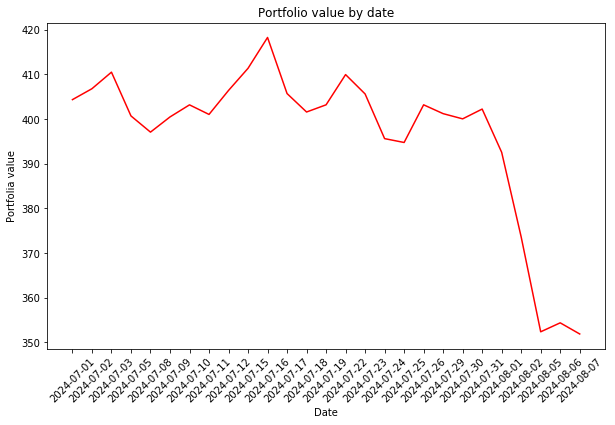

,Stock value_NIO,Stock value_BTC-USD,Stock_value_AMZN,Stock_value_CSPX.AS,Portfolio_value
Date,,,,,
2024-07-01,102.068969,100.284609,101.917407,100.082323,404.353309
2024-07-02,104.137938,98.971513,103.364512,100.329099,406.803062
2024-07-03,111.954023,96.011585,102.118968,100.423710,410.508285
2024-07-05,106.206896,90.408673,103.364512,100.725606,400.705687
2024-07-08,102.528739,90.476840,102.997565,101.073142,397.076286
2024-07-09,103.448278,92.557666,103.023407,101.448416,400.477767
2024-07-10,106.206896,92.132080,103.255976,101.589599,403.184551
2024-07-11,107.586205,91.497710,100.806242,101.150430,401.040587
2024-07-12,111.954023,92.382534,100.516823,101.559987,406.413366


In [8]:
#Now, let's assume we invest $100 into each of the 4 above stocks on July 1, 2024.
#Let's plot portfolia value over time


def add_value(row):
    row["Stock value"] = shares*row.Close + shares*row["Dividend sum"]
    return row

stock_dict = {}

# Loop through the list of cleaned dataframes (deviations_list)
# if any of them is for the stock that occurs in the final_list, then
# find the opening stock value as of Jul 1, 2024 and calculate how many shares we bought for $100
# Here, we also have an interesting but largely unnecesary (given the context) exercise:
# We sum up dividents for each day.
# In real life, dividents are not usually paid on a daily basis, and in this case, the initial dataframes
# have 0s in the dividend column for each day.
# So while some stocks may pay divdends on a larger time scale (quarterly), it goes beyond the scope of this particular
# task of plotting our portfolio value starting from July 1, 2024.
# However, for the sake of learning, let's imagine that we need to cover the case when there is some
# theoretical stock with daily dividend distribution. Let's imagine it's 1 on Jul 1, 2 on Jul 2, 5 on Jul 3
# So, the portfolio value (for an individual stock) for Jul 1 (end of day) is on
# Jul 1 (end of day): Shares * closing price + shares * 1,
# Jul 2 (eod): shares * closing price + shares * (1+2),
# Jul 3 (eod): shares * closing price + shares (1+2+5)

for stock_df in deviations_list:
    
    if stock_df.Name[0] in list(final_list):
        
        name = stock_df.Name[0]
        stock = stock_df.loc["2024-07-01":]
        stock.loc["2024-07-01", "Open"]
        
        # Find how many shares we bought
        shares = 100/stock.loc["2024-07-01", "Open"]

        stock["Dividend sum"] = ""
        sum_dividends = 0
        
        # Find dividends for each day:
        for i in range(len(stock.Dividends)):
            sum_dividends = sum_dividends + stock.iloc[i, 5]
            stock.iloc[i, 10] = sum_dividends

        # Calculate the value of the stock for each day
        stock = stock.apply(add_value, axis = 1)

        stock_dict[name] = stock

stock_list = list(stock_dict.keys())


# Now, let's join all 4 stocks. Here, we need only the stock value columns. The joining happens
# on indices (dates)
# Please note that if-else condition is needed for the proper naming of the columns in the joined table.
for j in range(len(stock_list)-1):
    if j == 0:
        joined = pd.DataFrame(stock_dict[stock_list[j]].iloc[:,11]).join(pd.DataFrame(stock_dict[stock_list[j+1]].iloc[:,11]), lsuffix="_"+stock_list[j], rsuffix="_"+stock_list[j+1]) #, lsuffix="_"+stock_list[j], rsuffix="_"+stock_list[j+1])
    else:
        next_data_frame = pd.DataFrame(stock_dict[stock_list[j+1]].iloc[:,11])
        next_data_frame.columns = ["Stock_value_"+stock_list[j+1]]
        joined = joined.join(next_data_frame)
        
joined


# Here we sum the values for all 4 stocks and find the portfolio value for each day
def summing(row):
    row.sum()
    row["Portfolio_value"] = row.sum()
    return row
    
joined = joined.apply(summing, axis = 1)

# Here, we plot the portfolio_value column of the dataframe
plt.figure(figsize = (10,6))
plt.plot(joined.index, joined['Portfolio_value'], color="red")
plt.xlabel("Date")
plt.xticks(rotation=45, fontsize=10)
plt.ylabel("Portfolia value")
plt.title("Portfolio value by date")
plt.show()
joined
